Linear Regression model

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
import statsmodels.api as sm
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np


                 Played       Won      Lost       N/R  Win_Ratio  lost_Ratio  \
Played         1.000000  0.974455  0.976001  0.340288  -0.571055    0.604298   
Won            0.974455  1.000000  0.902634  0.310496  -0.386099    0.421454   
Lost           0.976001  0.902634  1.000000  0.324119  -0.720826    0.753938   
N/R            0.340288  0.310496  0.324119  1.000000  -0.269511    0.170789   
Win_Ratio     -0.571055 -0.386099 -0.720826 -0.269511   1.000000   -0.989338   
lost_Ratio     0.604298  0.421454  0.753938  0.170789  -0.989338    1.000000   
WR_Difference -0.589260 -0.404869 -0.739366 -0.220707   0.997328   -0.997335   
Titles         0.329171  0.525738  0.131322 -0.187004   0.507094   -0.457704   
Finalists      0.406389  0.583900  0.216066  0.064038   0.410133   -0.375332   
Playoff        0.626324  0.755031  0.466630  0.329257   0.109716   -0.100734   

               WR_Difference    Titles  Finalists   Playoff  
Played             -0.589260  0.329171   0.406389  0.6263

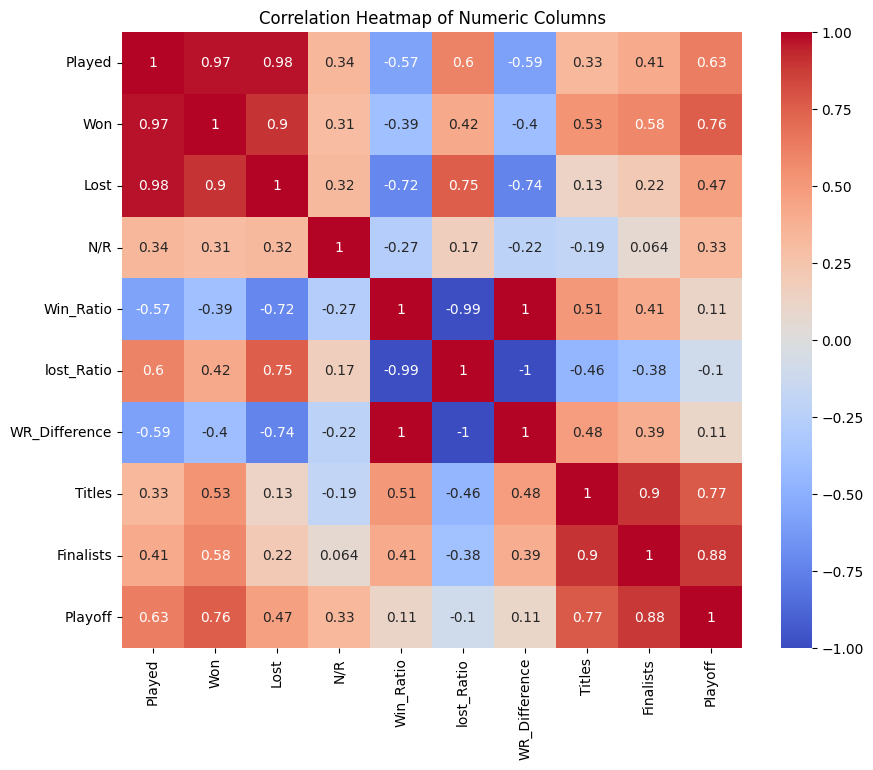

In [2]:

dataset = pd.read_csv("Full_Teams_Records.csv")

# Select only int and float columns
numeric_df = dataset.select_dtypes(include=[np.int64, np.float64])

# Calculate correlation matrix
correlation_matrix = numeric_df.corr()

# Print correlation matrix
print(correlation_matrix)

# Visualize correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation Heatmap of Numeric Columns')
plt.show()

In [3]:
x = numeric_df["WR_Difference"]


In [4]:
X = numeric_df[['Played', 'Won', 'Lost', 'N/R', 'lost_Ratio','Titles', 'Finalists', 'Playoff']]
y = numeric_df['Win_Ratio']

# Initialize the linear regression model
model = LinearRegression()

# Fit the model
model.fit(X, y)

LinearRegression()

In [5]:
# Print the coefficients
print("Coefficients:", model.coef_)
print("Intercept:", model.intercept_)

# Predict WR_Difference for the given data
predictions = model.predict(X)
numeric_df['Predicted_win_Ratio'] = predictions

# Display the DataFrame with predictions
print(numeric_df)

Coefficients: [-1.50080571e-01  1.28254514e-01  1.97807707e-01 -4.76142792e-01
 -1.19535710e+00 -2.99001008e-01  1.61717244e-01  4.90625220e-04]
Intercept: 106.87407780238829
   Played  Won  Lost  N/R  Win_Ratio  lost_Ratio  WR_Difference  Titles  \
0     261  144   117    0  55.172414   44.827586      10.344828       5   
1     256  123   129    4  48.046875   50.390625      -2.343750       0   
2     252  131   120    1  51.984127   47.619048       4.365079       3   
3     252  115   135    2  45.634921   53.571429      -7.936508       0   
4     246  112   134    0  45.528455   54.471545      -8.943089       0   
5     239  138    99    2  57.740586   41.422594      16.317992       5   
6     222  112   107    3  50.450450   48.198198       2.252252       1   
7     182   88    94    0  48.351648   51.648352      -3.296703       1   
8      45   28    17    0  62.222222   37.777778      24.444444       1   
9      44   24    19    1  54.545455   43.181818      11.363636       0   


In [6]:
predicted_df = pd.DataFrame({
    'Team': dataset['Team'],
    'actual': numeric_df['Win_Ratio'],
    'Predicted': numeric_df['Predicted_win_Ratio']
})
predicted_df

,Team,actual,Predicted
0,Mumbai Indians,55.172414,55.210923
1,Royal Challengers Bengaluru,48.046875,48.096156
2,Kolkata Knight Riders,51.984127,51.947431
3,Delhi Capitals,45.634921,45.682472
4,Punjab Kings,45.528455,45.874747
5,Chennai Super Kings,57.740586,57.948375
6,Rajasthan Royals,50.450450,50.070521
7,Sunrisers Hyderabad,48.351648,47.890606
8,Gujarat Titans,62.222222,61.941789
9,Lucknow Super Giants,54.545455,55.014133


In [17]:
predicted_df.to_csv("team_predicted.csv")

Summary of the model

In [7]:
# Add a constant to the model (intercept)
X = sm.add_constant(X)

# Fit the model using statsmodels
model = sm.OLS(y, X).fit()

# Print the summary
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:              Win_Ratio   R-squared:                       0.997
Model:                            OLS   Adj. R-squared:                  0.986
Method:                 Least Squares   F-statistic:                     92.34
Date:                Fri, 16 Aug 2024   Prob (F-statistic):             0.0108
Time:                        16:32:12   Log-Likelihood:                -1.7196
No. Observations:                  10   AIC:                             19.44
Df Residuals:                       2   BIC:                             21.86
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        106.8741      6.555     16.303      0.0

c:\Users\niran\AppData\Local\Programs\Python\Python312\Lib\site-packages\scipy\stats\_axis_nan_policy.py:418: UserWarning: `kurtosistest` p-value may be inaccurate with fewer than 20 observations; only n=10 observations were given.
  return hypotest_fun_in(*args, **kwds)


In [8]:
# Calculate R-squared
r_squared = r2_score(y, predictions)

# Calculate Mean Absolute Error (MAE)
mae = mean_absolute_error(y, predictions)

# Calculate Mean Squared Error (MSE)
mse = mean_squared_error(y, predictions)

# Calculate Root Mean Squared Error (RMSE)
rmse = np.sqrt(mse)

# Print model accuracy metrics
print("R-squared:", r_squared)
print("Mean Absolute Error (MAE):", mae)
print("Mean Squared Error (MSE):", mse)
print("Root Mean Squared Error (RMSE):", rmse)

R-squared: 0.9969153013296962
Mean Absolute Error (MAE): 0.23161999791318308
Mean Squared Error (MSE): 0.08258214199572816
Root Mean Squared Error (RMSE): 0.2873710876127384


In [9]:
# Assuming y and predictions are your actual and predicted values
z = numeric_df['WR_Difference']
predictions = model.predict(X)

# Calculate Mean Absolute Percentage Error (MAPE)
mape = np.mean(np.abs((z - predictions) / z)) * 100

print("Mean Absolute Percentage Error (MAPE):", mape, "%")

Mean Absolute Percentage Error (MAPE): 943.2893877822822 %


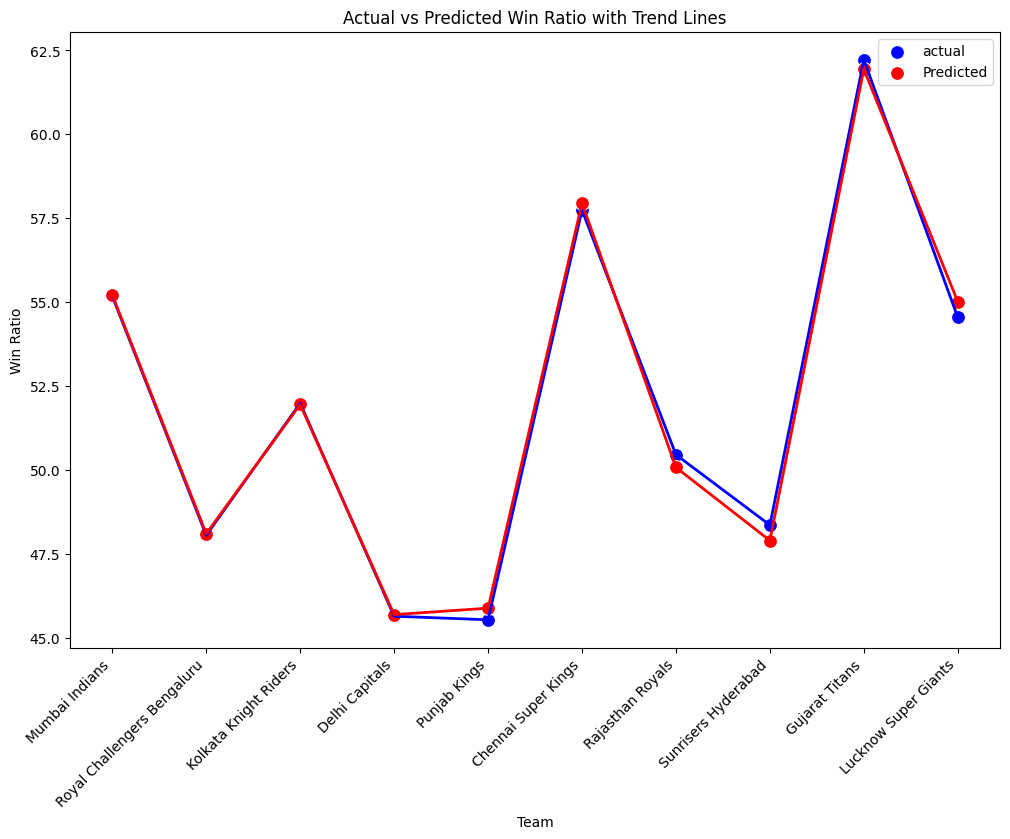

In [10]:
# Initialize the plot
plt.figure(figsize=(12, 8))

# Plot actual values
sns.scatterplot(x='Team', y='actual', data=predicted_df, color='blue', label='actual', s=100)

# Plot predicted values
sns.scatterplot(x='Team', y='Predicted', data=predicted_df, color='red', label='Predicted', s=100)

# Adding trend lines
sns.lineplot(x='Team', y='actual', data=predicted_df, color='blue', linewidth=2)
sns.lineplot(x='Team', y='Predicted', data=predicted_df, color='red', linewidth=2)

# Rotate x-axis labels for better readability
plt.xticks(rotation=45, ha='right')

# Add labels and title
plt.xlabel('Team')
plt.ylabel('Win Ratio')
plt.title('Actual vs Predicted Win Ratio with Trend Lines')

# Show legend
plt.legend()

R-squared (0.9969):
An R-squared value of 0.9969 means that approximately 99.69% of the variance in the WR_Difference is explained by your model. This is a very high R-squared value, suggesting that the model fits the data extremely well.
Mean Absolute Error (MAE) (0.2316):
The MAE indicates that, on average, the model's predictions are off by about 0.23 units from the actual values. This is a relatively small error, suggesting good predictive accuracy.
Mean Squared Error (MSE) (0.0826):
The MSE is low, which means that the average squared difference between the predicted and actual values is small. This further supports the model's accuracy.
Root Mean Squared Error (RMSE) (0.2874):
The RMSE is also low, indicating that the typical prediction error is about 0.29 units. RMSE is often preferred over MSE because it is in the same units as the target variable, making it easier to interpret.
Conclusion:
Overall Fit: The high R-squared value, combined with low MAE, MSE, and RMSE, suggests that your model is performing very well on the given dataset.
Potential Overfitting: While these metrics are excellent, it's important to ensure that the model is not overfitting the data. Overfitting occurs when a model captures noise in the training data as if it were a true pattern, leading to poor generalization to new data. You can check for overfitting by evaluating the model on a separate validation or test dataset.

In [11]:
# Actual vs predicted values differences
diff = numeric_df['Predicted_win_Ratio'] - numeric_df['Win_Ratio']

difference = pd.DataFrame({
    'Team': dataset['Team'],
    'actual': numeric_df['Win_Ratio'],
    'Predicted': numeric_df['Predicted_win_Ratio'],
    'difference': diff
})
difference

,Team,actual,Predicted,difference
0,Mumbai Indians,55.172414,55.210923,0.038509
1,Royal Challengers Bengaluru,48.046875,48.096156,0.049281
2,Kolkata Knight Riders,51.984127,51.947431,-0.036696
3,Delhi Capitals,45.634921,45.682472,0.047551
4,Punjab Kings,45.528455,45.874747,0.346291
5,Chennai Super Kings,57.740586,57.948375,0.207790
6,Rajasthan Royals,50.450450,50.070521,-0.379929
7,Sunrisers Hyderabad,48.351648,47.890606,-0.461042
8,Gujarat Titans,62.222222,61.941789,-0.280433
9,Lucknow Super Giants,54.545455,55.014133,0.468678


Polynomial linear regression model

In [12]:
# Convert to DataFrame
Poly = dataset

# Define the predictor variables (features) and the target variable
X = Poly[['Played', 'Won', 'Lost', 'N/R', 'Win_Ratio', 'lost_Ratio']]
y = Poly['Win_Ratio']

# Create polynomial features
poly = PolynomialFeatures(degree=2, include_bias=False)
X_poly = poly.fit_transform(X)

# Initialize the linear regression model
model_poly = LinearRegression()

# Fit the model
model_poly.fit(X_poly, y)

# Get predictions
predictions_poly = model_poly.predict(X_poly)

# Calculate R-squared
r_squared_poly = r2_score(y, predictions_poly)

# Calculate Mean Absolute Error (MAE)
mae_poly = mean_absolute_error(y, predictions_poly)

# Calculate Mean Squared Error (MSE)
mse_poly = mean_squared_error(y, predictions_poly)

# Calculate Root Mean Squared Error (RMSE)
rmse_poly = np.sqrt(mse_poly)

# Print model accuracy metrics
print("Polynomial Model R-squared:", r_squared_poly)
print("Polynomial Model Mean Absolute Error (MAE):", mae_poly)
print("Polynomial Model Mean Squared Error (MSE):", mse_poly)
print("Polynomial Model Root Mean Squared Error (RMSE):", rmse_poly)

Polynomial Model R-squared: 1.0
Polynomial Model Mean Absolute Error (MAE): 1.0658141036401503e-14
Polynomial Model Mean Squared Error (MSE): 1.5651000359584875e-28
Polynomial Model Root Mean Squared Error (RMSE): 1.2510395820910254e-14


<!-- # Convert to DataFrame
poly = dataset

# Define the predictor variables (features) and the target variable
X = df[['Played', 'Won', 'Lost', 'N/R', 'Win_Ratio', 'lost_Ratio']]
y = df['WR_Difference']

# Create polynomial features
poly = PolynomialFeatures(degree=2, include_bias=False)
X_poly = poly.fit_transform(X)

# Initialize the linear regression model
model_poly = LinearRegression()

# Fit the model
model_poly.fit(X_poly, y)

# Get predictions
predictions_poly = model_poly.predict(X_poly)

# Calculate R-squared
r_squared_poly = r2_score(y, predictions_poly)

# Calculate Mean Absolute Error (MAE)
mae_poly = mean_absolute_error(y, predictions_poly)

# Calculate Mean Squared Error (MSE)
mse_poly = mean_squared_error(y, predictions_poly)

# Calculate Root Mean Squared Error (RMSE)
rmse_poly = np.sqrt(mse_poly)

# Print model accuracy metrics
print("Polynomial Model R-squared:", r_squared_poly)
print("Polynomial Model Mean Absolute Error (MAE):", mae_poly)
print("Polynomial Model Mean Squared Error (MSE):", mse_poly)
print("Polynomial Model Root Mean Squared Error (RMSE):", rmse_poly) -->

In [13]:
check = dataset

check['wlRatio'] = check['Won'] / check['Lost']

check

,Team,Team_Name,Played,Won,Lost,N/R,Win_Ratio,lost_Ratio,WR_Difference,Titles,Finalists,Playoff,wlRatio
0,Mumbai Indians,MI,261,144,117,0,55.172414,44.827586,10.344828,5,6,11,1.230769
1,Royal Challengers Bengaluru,RCB,256,123,129,4,48.046875,50.390625,-2.343750,0,3,9,0.953488
2,Kolkata Knight Riders,KKR,252,131,120,1,51.984127,47.619048,4.365079,3,4,7,1.091667
3,Delhi Capitals,DC,252,115,135,2,45.634921,53.571429,-7.936508,0,1,6,0.851852
4,Punjab Kings,PK,246,112,134,0,45.528455,54.471545,-8.943089,0,1,2,0.835821
5,Chennai Super Kings,CSK,239,138,99,2,57.740586,41.422594,16.317992,5,10,13,1.393939
6,Rajasthan Royals,RR,222,112,107,3,50.450450,48.198198,2.252252,1,2,5,1.046729
7,Sunrisers Hyderabad,SRH,182,88,94,0,48.351648,51.648352,-3.296703,1,3,6,0.936170
8,Gujarat Titans,GT,45,28,17,0,62.222222,37.777778,24.444444,1,2,2,1.647059
9,Lucknow Super Giants,LSG,44,24,19,1,54.545455,43.181818,11.363636,0,0,2,1.263158


In [14]:
check[check['wlRatio'] > 1]['Team']


0           Mumbai Indians
2    Kolkata Knight Riders
5      Chennai Super Kings
6         Rajasthan Royals
8           Gujarat Titans
9     Lucknow Super Giants
Name: Team, dtype: object

In [15]:
check[check['wlRatio'] < 1]['Team']

1    Royal Challengers Bengaluru
3                 Delhi Capitals
4                   Punjab Kings
7            Sunrisers Hyderabad
Name: Team, dtype: object

In [16]:
check.to_csv("team_analysis.csv")